In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

# Data extracting from sql

In [2]:
connection_details = {"host": 'eufmd-database-1.cqodkl4vazie.eu-north-1.rds.amazonaws.com',
                      "user": 'root',
                      "password": 'YOUR_PASSWORD',
                      "db": 'db_training',
                      "port": 3306
}

In [3]:
def create_df_pymysql(connection_details, query):
    try:
        # Establish the database connection
        conn = pymysql.connect(**connection_details)
    
        # Create the dataframe
        df = pd.read_sql(query, conn)
        
    except pymysql.Error as e:
        print(f"Error: {e}")
        
    finally:
        # Close the connection (VERY IMPORTANT!)
        if conn:
            conn.close()

    return df

In [4]:
tom_data = "SELECT * FROM db_tompilot.tom_enrolments"

tom_enrolments = create_df_pymysql(connection_details, tom_data)

/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_97594/1828803800.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# Data cleaning and Feature Engineering

In [5]:
tom_enrolments.head()

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
0,6379,Jon Simonyan,jsimmk19@mail.ru,Open Session Online 2014,Open Session Online 2014,NU,Erevan,Armenia,,,No,2020-07-10 00:00:00,None,50.0,Open,45.0,Resources / Open Session,179
1,6392,Mariam Militosyan,militosyan_96@mail.ru,Обучающий Онлайн Курс по Изучению Ящура на рус...,FITC_RU4,FMD Investigation Training Course,,Armenia,,,Yes,2020-09-17 00:00:00,2020-10-21 00:00:00,100.0,Completed,244.0,FMD Investigation Training Course,180
2,6393,Mariam Militosyan,militosyan_96@mail.ru,Knowledge Bank,Knowledge Bank,NU,,Armenia,,,No,2020-09-28 00:00:00,None,50.0,Open,3.0,Resources,181
3,6394,Irma Artushyan,irma.artushyan95@mail.ru,Обучающий Онлайн Курс по Изучению Ящура на рус...,FITC_RU4,FMD Investigation Training Course,,Armenia,,,Yes,2020-09-17 00:00:00,2020-10-21 00:00:00,100.0,Completed,244.0,FMD Investigation Training Course,183
4,6395,Irma Artushyan,irma.artushyan95@mail.ru,Open Session Online 2014,Open Session Online 2014,NU,,Armenia,,,No,2020-05-10 00:00:00,None,50.0,Open,45.0,Resources / Open Session,185


In [6]:
brick_mapping = pd.read_excel("data/brick_mapping.xlsx")

In [7]:
brick_mapping.head()

,main_topic,Disease covered,Foundation: Simulation exercises,Foundation: Training,Foundation: Laboratories,Foundation: Contingency planning,Foundation: Assessment,"Foundation: Identification, Registration and traceability",Foundation: Risk assessment,Foundation: Information data management,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,African Animal Trypanosomosis,FAST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African Swine Fever,FMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Animal Depopulation,FAST,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Biorisk,FMD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Epidemiology,Single Disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
master_courses = pd.read_excel("data/master_courses.xlsx")

In [9]:
master_courses.head()

,moodle_id,shortname,fullname,language,format,moodle_category,main_topic,level,edition,pillar,duration
0,1,EuFMD vLearning,EuFMD Virtual Learning,NaN,vlearning,NaN,NU,NaN,1,NaN,12
1,2,KTC 6 Induction Course,KTC 6 Induction Course,English,face to face,Kathmandu Real Time Training,FMD Emergency Preparation Course,Advanced,6,Pillar I,10
2,3,Knowledge Bank,Knowledge Bank,English,vlearning,Resources,NU,NaN,1,NaN,12
3,4,Playpen,Playpen,English,vlearning,Administration,NU,NaN,1,NaN,12
4,7,KTC 7 Induction Course,KTC 7 Induction Course,English,face to face,Kathmandu Real Time Training,FMD Emergency Preparation Course,Advanced,7,Pillar I,10


In [10]:
# Replace empty strings with NaN in the same columns
brick_mapping.iloc[:, 2:] = brick_mapping.iloc[:, 2:].replace('', np.nan)

# Fill NaN with 0 in the same columns
brick_mapping.iloc[:, 2:] = brick_mapping.iloc[:, 2:].fillna(0)

In [11]:
brick_mapping.head()

,main_topic,Disease covered,Foundation: Simulation exercises,Foundation: Training,Foundation: Laboratories,Foundation: Contingency planning,Foundation: Assessment,"Foundation: Identification, Registration and traceability",Foundation: Risk assessment,Foundation: Information data management,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,African Animal Trypanosomosis,FAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,African Swine Fever,FMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Animal Depopulation,FAST,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Biorisk,FMD,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Epidemiology,Single Disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
brick_mapping["main_topic"] = brick_mapping["main_topic"].str.lower()
tom_enrolments["course_category"] = tom_enrolments["course_category"].str.lower()
tom_enrolments["course_fullname"] = tom_enrolments["course_fullname"].str.lower()
tom_enrolments["course_shortname"] = tom_enrolments["course_shortname"].str.lower()
master_courses["shortname"] = master_courses["shortname"].str.lower()
master_courses["fullname"] = master_courses["fullname"].str.lower()
master_courses["main_topic"] = master_courses["main_topic"].str.lower()
master_courses["moodle_category"] = master_courses["moodle_category"].str.lower()

In [13]:
brick_mapping.isnull().sum()

main_topic                                                   0
Disease covered                                              8
Foundation: Simulation exercises                             0
Foundation: Training                                         0
Foundation: Laboratories                                     0
Foundation: Contingency planning                             0
Foundation: Assessment                                       0
Foundation: Identification, Registration and traceability    0
Foundation: Risk assessment                                  0
Foundation: Information data management                      0
Foundation: Models                                           0
Foundation: Surveillance                                     0
Alert: Awareness                                             0
Alert: Clinical Examination                                  0
Alert: Epidemiological Investigation                         0
Alert: Sampling                                        

In [14]:
master_courses.isnull().sum()

moodle_id            0
shortname            0
fullname             0
language             1
format               0
moodle_category      1
main_topic           0
level               99
edition              0
pillar             200
duration             0
dtype: int64

In [15]:
tom_enrolments.isnull().sum()

id                   0
full_name            0
email                0
course_fullname      0
course_shortname     0
course_category      0
city                 0
country              0
institution          0
role                 0
completed            0
time_enrolled        0
time_completed      52
progress             0
status               0
course_id           32
moodle_category      0
new_id               0
dtype: int64

In [16]:
# Find the intersection between the two datasets
common_courses = set(tom_enrolments["course_shortname"]) & set(master_courses["shortname"])

# Print the common courses
print("Common Courses:")
for course in common_courses:
    print(course)

Common Courses:
fepc_en9
fitc_wcana_enfr_1
flitc3
training focal points
fitc_ncw_africa
contingency planning network
biorisk
modelling training course for turkey
simex_workshop1
préparation d'urgence contre la fièvre aphteuse
lsd_multicountry
ddcd
fitc_ar2
fepc_es5
fepc_ru_1
rbsp
fdcm
about
introrvf
flitc
socio-economic
appp-fast
lsd_2
modelling network
modelling 2018
pvm5
knowledge bank
safe trade and fmd control workshop
eufmdis
fepc_en12
asf_pilot
contingency planning knowledge bank
asf_europe
introduction to foot-and-mouth disease
cascade training
fitc_tr4
st_3
open session online 2016
fitc_ru2
ravc
os18
emergency preparedness network
open session online 2014
afrique du nord
ravc_3
fast_dwsc
fitc_tr6
opensimex
fepc_en13
erzurum real time training
modelling introductory course 
rvf_arabic
west eurasia fmd networks
fitc_ru3
fepc_canada2
pvm2
simex_pt_es
fepc_es
se_3
fitc_ru4
fitc_ar
lsd_pilot
fitc_tn
help
what is the progressive control pathway?
biorisk_management_network
earln
fepc_

In [17]:
# Convert course categories to sets
tom_categories = set(tom_enrolments["course_shortname"])
master_topics = set(master_courses["shortname"])

# Find courses in Tom's enrolments but not in brick_mapping (difference)
tom_only_courses = tom_categories.difference(master_topics)

# Find courses in brick_mapping but not in Tom's enrolments (difference)
master_only_courses = master_topics.difference(tom_categories)

# Print courses only in Tom's enrolments
print("Courses only in Tom's enrolments:")
for course in tom_only_courses:
    print(course)

Courses only in Tom's enrolments:
pvp_3_23
intro_fmd_2_1
intro_sppgtp
fepc_en14


In [18]:
# Print courses only in brick_mapping
print("Courses only in master_courses:")
for course in master_only_courses:
    print(course)

Courses only in master_courses:
ravc_2
lsd_rap
lsd_vlc_sadc
fepc_en_8
rbs
fitc_saarc
asf_balkanregion
ntc 15 induction course
fepc_caribbean
fepc_en_4
focusgroup
ctc_1
rpl_epr_3
rpl_dpcps_3
intro_ahs
rpl_tad2
ug_mp
fepc_belgium_frnl_1_2021
ktc 32
fitc_vlc_ea
rpl_epi4
fmd emergency preparation course linktads
fepc_au4
formation_fa_fr
pso_repository
rpl_bios_3
ntc31
amr_ffs_copy
r-fetpv first module
rpl_idma_1
fepc_au1
rpl_epi3
ktc 13 real time training
south eastern europe discussion group
fmd modeling sk
workshop portugal october 2016
lsd_ea_vlc
eufmd vlearning
ps_fast
ktc 20 real time training
fepc_en_7
ug_mt
atelier mali
isavetfir
fepc_sr_hr
ktc 23 real time training
pcp-fmd_kenya_2023
fitc_al
fepc_en_5
managing a crisis
fepc_fra3
flitc_test
asf_asiapac
rpl_epi1
ntc 26 real time training
aat
refresher training example
test_fp
course reports
fepc_fra1
vrtt_us_2
rpl_edm_3
resources archive
fepc_en_3
eufmd_see
utc1
fepc_rs_2
ug_id
introduction to biostatistics
putting vaccination into p

In [19]:
tom_enrolments[tom_enrolments["course_id"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,completed,time_enrolled,time_completed,progress,status,course_id,moodle_category,new_id
485,6474,German Caceres Garrido,gcaceres@mapa.es,training focal points,training focal points,nu,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2014-03-27 00:00:00,None,0.0,Open,NaN,Discussion Groups,3870
486,6475,German Caceres Garrido,gcaceres@mapa.es,modelling introductory course: september 2015,modelling introductory course,modelling,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2014-09-07 00:00:00,None,77.8,Open,NaN,Workshop Induction Courses,3871
487,6479,German Caceres Garrido,gcaceres@mapa.es,contingency planning knowledge bank,contingency planning knowledge bank,contingency planning,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2014-12-04 00:00:00,None,0.0,Open,NaN,Resources,3875
488,6480,German Caceres Garrido,gcaceres@mapa.es,fmd emergency preparation course uk,fepc_uk,fmd emergency preparation course,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2015-05-07 00:00:00,None,42.9,Open,NaN,English,3876
489,6481,German Caceres Garrido,gcaceres@mapa.es,curso de preparación para alertas de fiebre af...,fepc_es,fmd emergency preparation course,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2015-05-28 00:00:00,None,0.0,Open,NaN,Spanish,3877
490,6497,German Caceres Garrido,gcaceres@mapa.es,foot-and-mouth disease wildlife surveillance i...,wildlife surveillance spain,wildlife surveillance,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2019-01-09 00:00:00,None,60.0,Open,NaN,Workshop Induction Courses,3893
491,6498,German Caceres Garrido,gcaceres@mapa.es,regional approach: portugal-spain fmd simulati...,simex_pt_es,simulation exercises,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2019-03-18 00:00:00,None,0.0,Open,NaN,Workshop Induction Courses,3894
492,6499,German Caceres Garrido,gcaceres@mapa.es,open session online 2018,os18,open session,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,No,2019-04-09 00:00:00,None,1.2,Open,NaN,Open Session,3895
493,6519,Elena Garcia Villacieros,EGVillacieros@mapama.es,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,open access courses,,Spain,,,No,2020-05-19 00:00:00,None,14.3,Open,NaN,Open Access Courses,3915
494,6520,Elena Garcia Villacieros,EGVillacieros@mapama.es,organizing simulation exercises for animal dis...,simex_online,simulation exercises,,Spain,,,Yes,2020-06-10 00:00:00,2020-07-12 00:00:00,100.0,Completed,NaN,Simulation Exercises,3916


In [20]:
tom_enrolments.isnull().sum()

id                   0
full_name            0
email                0
course_fullname      0
course_shortname     0
course_category      0
city                 0
country              0
institution          0
role                 0
completed            0
time_enrolled        0
time_completed      52
progress             0
status               0
course_id           32
moodle_category      0
new_id               0
dtype: int64

In [21]:
tom_enrolments.loc[511]

id                                                    6539
full_name                            Sergio Bonilla Garcia
email                                     sbonilla@mapa.es
course_fullname     introduction to sheep pox and goat pox
course_shortname                              intro_sppgtp
course_category                        open access courses
city                                                      
country                                              Spain
institution                                               
role                 Central level government veterinarian
completed                                              Yes
time_enrolled                          2023-11-20 00:00:00
time_completed                         2023-11-20 00:00:00
progress                                             100.0
status                                           Completed
course_id                                              NaN
moodle_category                        Open Access Cours

# Merge master_courses with tom_enrolments

In [22]:
# Merge the DataFrames based on the new mapping
merge_master_enrolments = pd.merge(tom_enrolments, master_courses, left_on="course_shortname", right_on="shortname", how="left")

In [23]:
merge_master_enrolments.head()

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,shortname,fullname,language,format,moodle_category_y,main_topic,level,edition,pillar,duration
0,6379,Jon Simonyan,jsimmk19@mail.ru,open session online 2014,open session online 2014,nu,Erevan,Armenia,,,...,open session online 2014,open session online 2014,English,vlearning,open session,nu,NaN,2014.0,NaN,12.0
1,6392,Mariam Militosyan,militosyan_96@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,fitc_ru4,ðžð±ñƒñ‡ð°ñžñ‰ð¸ð¹ ðžð½ð»ð°ð¹ð½ ðšñƒñ€ñ ð¿ð¾ ...,Russian,vlearning,fmd investigation training course,fmd investigation training course,Intermediate,4.0,Pillar II,112.0
2,6393,Mariam Militosyan,militosyan_96@mail.ru,knowledge bank,knowledge bank,nu,,Armenia,,,...,knowledge bank,knowledge bank,English,vlearning,resources,nu,NaN,1.0,NaN,12.0
3,6394,Irma Artushyan,irma.artushyan95@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,fitc_ru4,ðžð±ñƒñ‡ð°ñžñ‰ð¸ð¹ ðžð½ð»ð°ð¹ð½ ðšñƒñ€ñ ð¿ð¾ ...,Russian,vlearning,fmd investigation training course,fmd investigation training course,Intermediate,4.0,Pillar II,112.0
4,6395,Irma Artushyan,irma.artushyan95@mail.ru,open session online 2014,open session online 2014,nu,,Armenia,,,...,open session online 2014,open session online 2014,English,vlearning,open session,nu,NaN,2014.0,NaN,12.0


In [24]:
merge_master_enrolments.isna().sum()

id                     0
full_name              0
email                  0
course_fullname        0
course_shortname       0
course_category        0
city                   0
country                0
institution            0
role                   0
completed              0
time_enrolled          0
time_completed        52
progress               0
status                 0
course_id             32
moodle_category_x      0
new_id                 0
moodle_id             26
shortname             26
fullname              26
language              26
format                26
moodle_category_y     26
main_topic            26
level                267
edition               26
pillar               357
duration              26
dtype: int64

In [25]:
merge_master_enrolments[merge_master_enrolments["moodle_id"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,shortname,fullname,language,format,moodle_category_y,main_topic,level,edition,pillar,duration
511,6539,Sergio Bonilla Garcia,sbonilla@mapa.es,introduction to sheep pox and goat pox,intro_sppgtp,open access courses,,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,6540,Isabel Maria Guijarro Torvisco,imguijarro@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,6542,Fatima GuerreroCarvajal,fguerrero@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,6687,Ramona Wissmann,ramona.wissmann@lu.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,6688,Anna Lena Muñoz-Zogg,annalena.munoz@alt.gr.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,"Chur, Graubünden",Switzerland,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,6689,Herrmann Meinhardis,meinhardis.herrmann@lu.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,6690,Herrmann Meinhardis,meinhardis.herrmann@lu.ch,introduction to foot-and-mouth disease,intro_fmd_2_1,open access courses,,Switzerland,,Regional level/field veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,6691,Andrea Stoller,andrea.stoller@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,6692,Dominique Dietiker,dominique.dietiker@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,6693,Larissa Inglin,larissa.inglin@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,Zürich,Switzerland,,Regional level/field veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
merge_master_enrolments[merge_master_enrolments["course_id"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,shortname,fullname,language,format,moodle_category_y,main_topic,level,edition,pillar,duration
485,6474,German Caceres Garrido,gcaceres@mapa.es,training focal points,training focal points,nu,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,training focal points,training focal points,English,vlearning,discussion groups,nu,NaN,1.0,NaN,12.0
486,6475,German Caceres Garrido,gcaceres@mapa.es,modelling introductory course: september 2015,modelling introductory course,modelling,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,modelling introductory course,modelling introductory course: september 2015,English,workshop,workshop induction courses,modelling,Advanced,1.0,NaN,12.0
487,6479,German Caceres Garrido,gcaceres@mapa.es,contingency planning knowledge bank,contingency planning knowledge bank,contingency planning,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,contingency planning knowledge bank,contingency planning knowledge bank,English,vlearning,resources,nu,NaN,1.0,NaN,12.0
488,6480,German Caceres Garrido,gcaceres@mapa.es,fmd emergency preparation course uk,fepc_uk,fmd emergency preparation course,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,fepc_uk,fmd emergency preparation course uk,English,vlearning,english,fmd emergency preparation course,Intermediate,1.0,Pillar I,12.0
489,6481,German Caceres Garrido,gcaceres@mapa.es,curso de preparación para alertas de fiebre af...,fepc_es,fmd emergency preparation course,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,fepc_es,curso de preparaciã³n para alertas de fiebre a...,Spanish,vlearning,spanish,fmd emergency preparation course,Intermediate,1.0,Pillar I,12.0
490,6497,German Caceres Garrido,gcaceres@mapa.es,foot-and-mouth disease wildlife surveillance i...,wildlife surveillance spain,wildlife surveillance,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,wildlife surveillance spain,foot-and-mouth disease wildlife surveillance i...,English,workshop,workshop induction courses,wildlife surveillance,Advanced,1.0,NaN,12.0
491,6498,German Caceres Garrido,gcaceres@mapa.es,regional approach: portugal-spain fmd simulati...,simex_pt_es,simulation exercises,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,simex_pt_es,regional approach: portugal-spain fmd simulati...,English,workshop,workshop induction courses,simulation,Advanced,1.0,NaN,12.0
492,6499,German Caceres Garrido,gcaceres@mapa.es,open session online 2018,os18,open session,Madrid,Spain,Royal Veterinary College,Central level government veterinarian,...,os18,open session online 2018,English,vlearning,open session,nu,NaN,18.0,NaN,12.0
493,6519,Elena Garcia Villacieros,EGVillacieros@mapama.es,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,open access courses,,Spain,,,...,introduction to foot-and-mouth disease,introduction to foot-and-mouth disease,English,vlearning,open access courses,fmd emergency preparation course,Introduction,1.0,NaN,12.0
494,6520,Elena Garcia Villacieros,EGVillacieros@mapama.es,organizing simulation exercises for animal dis...,simex_online,simulation exercises,,Spain,,,...,simex_online,organizing simulation exercises for animal dis...,English,vlearning,simulation exercises,simulation,Intermediate,1.0,NaN,13.0


In [85]:
missing_id = merge_master_enrolments["course_id"].isna()

# Replace NaN values in course_id with corresponding moodle_id where condition is True
merge_master_enrolments.loc[missing_id, "course_id"] = merge_master_enrolments.loc[missing_id, "moodle_id"]


# # or other way to do it
# for index, row in merge_master_enrolments.iterrows():
#     if pd.isna(row["course_id"]) and not pd.isna(row["moodle_id"]):
#         merge_master_enrolments.loc[index, "course_id"] = row["moodle_id"]

In [84]:
merge_master_enrolments.isna().sum()

id                     0
full_name              0
email                  0
course_fullname        0
course_shortname       0
course_category        0
city                   0
country                0
institution            0
role                   0
completed              0
time_enrolled          0
time_completed        52
progress               0
status                 0
course_id              3
moodle_category_x      0
new_id                 0
moodle_id             26
shortname             26
fullname              26
language              26
format                26
moodle_category_y     26
main_topic            26
level                267
edition               26
pillar               357
duration              26
dtype: int64

In [29]:
tom_enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                569 non-null    int64  
 1   full_name         569 non-null    object 
 2   email             569 non-null    object 
 3   course_fullname   569 non-null    object 
 4   course_shortname  569 non-null    object 
 5   course_category   569 non-null    object 
 6   city              569 non-null    object 
 7   country           569 non-null    object 
 8   institution       569 non-null    object 
 9   role              569 non-null    object 
 10  completed         569 non-null    object 
 11  time_enrolled     569 non-null    object 
 12  time_completed    517 non-null    object 
 13  progress          569 non-null    float64
 14  status            569 non-null    object 
 15  course_id         537 non-null    float64
 16  moodle_category   569 non-null    object 
 1

In [30]:
merge_master_enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   full_name          569 non-null    object 
 2   email              569 non-null    object 
 3   course_fullname    569 non-null    object 
 4   course_shortname   569 non-null    object 
 5   course_category    569 non-null    object 
 6   city               569 non-null    object 
 7   country            569 non-null    object 
 8   institution        569 non-null    object 
 9   role               569 non-null    object 
 10  completed          569 non-null    object 
 11  time_enrolled      569 non-null    object 
 12  time_completed     517 non-null    object 
 13  progress           569 non-null    float64
 14  status             569 non-null    object 
 15  course_id          566 non-null    float64
 16  moodle_category_x  569 non

In [31]:
merge_master_enrolments[merge_master_enrolments["course_id"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,shortname,fullname,language,format,moodle_category_y,main_topic,level,edition,pillar,duration
511,6539,Sergio Bonilla Garcia,sbonilla@mapa.es,introduction to sheep pox and goat pox,intro_sppgtp,open access courses,,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,6540,Isabel Maria Guijarro Torvisco,imguijarro@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,6542,Fatima GuerreroCarvajal,fguerrero@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
merge_master_enrolments[merge_master_enrolments["moodle_id"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,shortname,fullname,language,format,moodle_category_y,main_topic,level,edition,pillar,duration
511,6539,Sergio Bonilla Garcia,sbonilla@mapa.es,introduction to sheep pox and goat pox,intro_sppgtp,open access courses,,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,6540,Isabel Maria Guijarro Torvisco,imguijarro@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,6542,Fatima GuerreroCarvajal,fguerrero@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,6687,Ramona Wissmann,ramona.wissmann@lu.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,6688,Anna Lena Muñoz-Zogg,annalena.munoz@alt.gr.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,"Chur, Graubünden",Switzerland,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,6689,Herrmann Meinhardis,meinhardis.herrmann@lu.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,6690,Herrmann Meinhardis,meinhardis.herrmann@lu.ch,introduction to foot-and-mouth disease,intro_fmd_2_1,open access courses,,Switzerland,,Regional level/field veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,6691,Andrea Stoller,andrea.stoller@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,6692,Dominique Dietiker,dominique.dietiker@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,6693,Larissa Inglin,larissa.inglin@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,Zürich,Switzerland,,Regional level/field veterinarian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
merge_master_enrolments[
    merge_master_enrolments['moodle_category_x'].notnull() &
    merge_master_enrolments['moodle_category_y'].notnull()
][['moodle_category_x', 'moodle_category_y']]


,moodle_category_x,moodle_category_y
0,Resources / Open Session,open session
1,FMD Investigation Training Course,fmd investigation training course
2,Resources,resources
3,FMD Investigation Training Course,fmd investigation training course
4,Resources / Open Session,open session
...,...,...
541,,english
542,,resources
543,,resources
544,,resources


# Merge master_enrolments with bricks mapping

In [34]:
# Merge the DataFrames based on the new mapping
merge_master_enrolments_bricks = pd.merge(merge_master_enrolments, brick_mapping, left_on="main_topic", right_on="main_topic", how="left")

In [35]:
merge_master_enrolments_bricks.head()

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,6379,Jon Simonyan,jsimmk19@mail.ru,open session online 2014,open session online 2014,nu,Erevan,Armenia,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6392,Mariam Militosyan,militosyan_96@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6393,Mariam Militosyan,militosyan_96@mail.ru,knowledge bank,knowledge bank,nu,,Armenia,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6394,Irma Artushyan,irma.artushyan95@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6395,Irma Artushyan,irma.artushyan95@mail.ru,open session online 2014,open session online 2014,nu,,Armenia,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
merge_master_enrolments_bricks.columns

Index(['id', 'full_name', 'email', 'course_fullname', 'course_shortname',
       'course_category', 'city', 'country', 'institution', 'role',
       'completed', 'time_enrolled', 'time_completed', 'progress', 'status',
       'course_id', 'moodle_category_x', 'new_id', 'moodle_id', 'shortname',
       'fullname', 'language', 'format', 'moodle_category_y', 'main_topic',
       'level', 'edition', 'pillar', 'duration', 'Disease covered',
       'Foundation: Simulation exercises', 'Foundation: Training',
       'Foundation: Laboratories', 'Foundation: Contingency planning',
       'Foundation: Assessment',
       'Foundation: Identification, Registration and traceability',
       'Foundation: Risk assessment',
       'Foundation: Information data management', 'Foundation: Models',
       'Foundation: Surveillance', 'Alert: Awareness',
       'Alert: Clinical Examination', 'Alert: Epidemiological Investigation',
       'Alert: Sampling', 'Alert: Farm biosecurity',
       'Alert: Personal b

In [37]:
merge_master_enrolments_bricks.iloc[:, 30:]

,Foundation: Simulation exercises,Foundation: Training,Foundation: Laboratories,Foundation: Contingency planning,Foundation: Assessment,"Foundation: Identification, Registration and traceability",Foundation: Risk assessment,Foundation: Information data management,Foundation: Models,Foundation: Surveillance,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Replace empty strings with NaN in the same columns
merge_master_enrolments_bricks.iloc[:, 30:] = merge_master_enrolments_bricks.iloc[:, 30:].replace('', np.nan)

# Fill NaN with 0 in the same columns
merge_master_enrolments_bricks.iloc[:, 30:] = merge_master_enrolments_bricks.iloc[:, 30:].fillna(0)

In [39]:
merge_master_enrolments_bricks.head()

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
0,6379,Jon Simonyan,jsimmk19@mail.ru,open session online 2014,open session online 2014,nu,Erevan,Armenia,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6392,Mariam Militosyan,militosyan_96@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6393,Mariam Militosyan,militosyan_96@mail.ru,knowledge bank,knowledge bank,nu,,Armenia,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6394,Irma Artushyan,irma.artushyan95@mail.ru,обучающий онлайн курс по изучению ящура на рус...,fitc_ru4,fmd investigation training course,,Armenia,,,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6395,Irma Artushyan,irma.artushyan95@mail.ru,open session online 2014,open session online 2014,nu,,Armenia,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
merge_master_enrolments_bricks.isna().sum()

id                                            0
full_name                                     0
email                                         0
course_fullname                               0
course_shortname                              0
                                             ..
Emergency: Coordination and PPP               0
Emergency: Wildlife                           0
Reconstruction: Recovery of disease status    0
Reconstruction: Vaccination exit strategy     0
Reconstruction: Re-stocking                   0
Length: 62, dtype: int64

In [41]:
merge_master_enrolments_bricks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 62 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         569 non-null    int64  
 1   full_name                                                  569 non-null    object 
 2   email                                                      569 non-null    object 
 3   course_fullname                                            569 non-null    object 
 4   course_shortname                                           569 non-null    object 
 5   course_category                                            569 non-null    object 
 6   city                                                       569 non-null    object 
 7   country                                                    569 non-null    object 
 8   institutio

In [42]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks["course_shortname"] == "intro_sppgtp"]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
511,6539,Sergio Bonilla Garcia,sbonilla@mapa.es,introduction to sheep pox and goat pox,intro_sppgtp,open access courses,,Spain,,Central level government veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks["main_topic"].isna()]

,id,full_name,email,course_fullname,course_shortname,course_category,city,country,institution,role,...,Emergency: Restricted zones,Emergency: Psychological support,Emergency: Resource and impact tools and calculators,Emergency: Logistic,Emergency: National emergency anagement,Emergency: Coordination and PPP,Emergency: Wildlife,Reconstruction: Recovery of disease status,Reconstruction: Vaccination exit strategy,Reconstruction: Re-stocking
511,6539,Sergio Bonilla Garcia,sbonilla@mapa.es,introduction to sheep pox and goat pox,intro_sppgtp,open access courses,,Spain,,Central level government veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,6540,Isabel Maria Guijarro Torvisco,imguijarro@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,6542,Fatima GuerreroCarvajal,fguerrero@mapa.es,putting vaccination into practice - september/...,pvp_3_23,workshop induction courses,Madrid,Spain,,Central level government veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,6687,Ramona Wissmann,ramona.wissmann@lu.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,6688,Anna Lena Muñoz-Zogg,annalena.munoz@alt.gr.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,"Chur, Graubünden",Switzerland,,Central level government veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,6689,Herrmann Meinhardis,meinhardis.herrmann@lu.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Regional level/field veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,6690,Herrmann Meinhardis,meinhardis.herrmann@lu.ch,introduction to foot-and-mouth disease,intro_fmd_2_1,open access courses,,Switzerland,,Regional level/field veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,6691,Andrea Stoller,andrea.stoller@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,6692,Dominique Dietiker,dominique.dietiker@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,,Switzerland,,Central level government veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551,6693,Larissa Inglin,larissa.inglin@veta.zh.ch,fmd emergency preparation course multicountry ...,fepc_en14,fmd emergency preparation course,Zürich,Switzerland,,Regional level/field veterinarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

In [44]:
# List of brick columns
brick_columns = [col for col in merge_master_enrolments_bricks.columns if col.startswith(('Foundation', 'Alert', 'Emergency', 'Reconstruction'))]

# Initialize an empty list to store rows
aggregated_rows = []

# Iterate over each brick column
for brick_col in brick_columns:
    # Filter rows where the brick column has a value of 1
    filtered_rows = merge_master_enrolments_bricks[merge_master_enrolments_bricks[brick_col] == 1]
    
    # Extract Main topic from filtered rows
    main_topics = filtered_rows['main_topic'].tolist()
    
    # Determine main category
    if brick_col.startswith('Foundation'):
        main_category = 'Foundation'
    elif brick_col.startswith('Alert'):
        main_category = 'Alert'
    elif brick_col.startswith('Emergency'):
        main_category = 'Emergency'
    elif brick_col.startswith('Reconstruction'):
        main_category = 'Reconstruction'
    else:
        continue  # Skip if no matching category found
    
    # Create dictionary for the current brick
    brick_dict = {
        'Brick': brick_col.split(': ')[1],
        'Main Category': main_category,
        'Topics': main_topics
    }
    
    # Append to aggregated rows
    aggregated_rows.append(brick_dict)

# Create a new DataFrame from aggregated rows
new_brick_map = pd.DataFrame(aggregated_rows)

# Print the aggregated DataFrame
new_brick_map

,Brick,Main Category,Topics
0,Simulation exercises,Foundation,[biorisk]
1,Training,Foundation,[]
2,Laboratories,Foundation,"[fmd emergency preparation course, fmd emergen..."
3,Contingency planning,Foundation,"[fmd investigation training course, fmd invest..."
4,Assessment,Foundation,[]
5,"Identification, Registration and traceability",Foundation,[]
6,Risk assessment,Foundation,[]
7,Information data management,Foundation,[]
8,Models,Foundation,[]
9,Surveillance,Foundation,"[fmd investigation training course, fmd invest..."


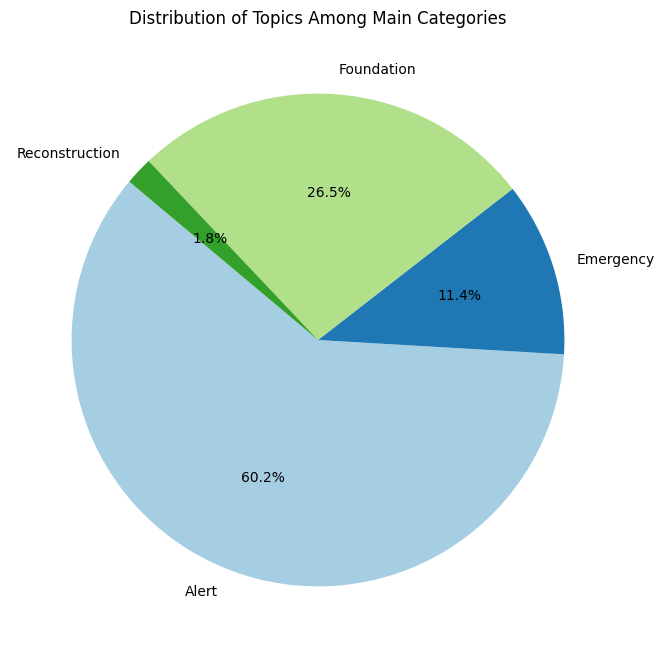

In [45]:
# Count the number of topics for each brick
new_brick_map['Topic Count'] = new_brick_map['Topics'].apply(len)

# Aggregate the topic counts by main category
category_counts = new_brick_map.groupby('Main Category')['Topic Count'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Topics Among Main Categories')
plt.show()

In [46]:
category_counts

Main Category
Alert             1052
Emergency          200
Foundation         464
Reconstruction      32
Name: Topic Count, dtype: int64

In [47]:
# Aggregate the topic counts by main category
topic_counts = new_brick_map.groupby('Brick')['Topic Count'].sum().sort_values(ascending=False)
topic_counts

Brick
Contingency planning                             192
Personal biosecurity                             182
Sampling                                         177
Surveillance                                     177
Farm biosecurity                                 177
Epidemiological Investigation                    172
Restricted zones                                 172
Awareness                                        172
Clinical Examination                             172
Laboratories                                      94
Vaccination                                       16
Recovery of disease status                        16
Vaccination exit strategy                         16
Psychological support                              4
Communication                                      4
Humane killing of animals                          4
Simulation exercises                               1
Assessment                                         0
Risk assessment                         

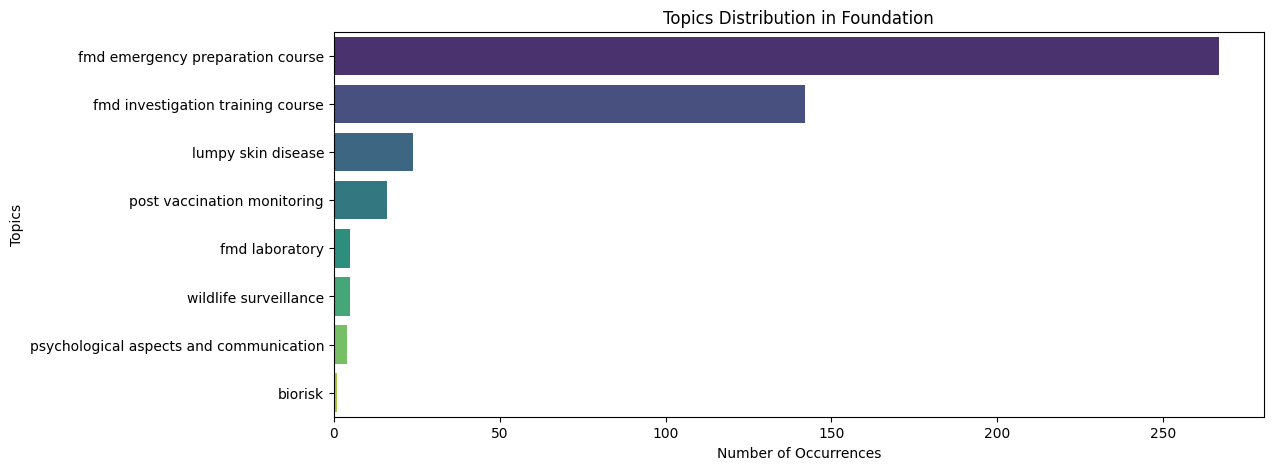

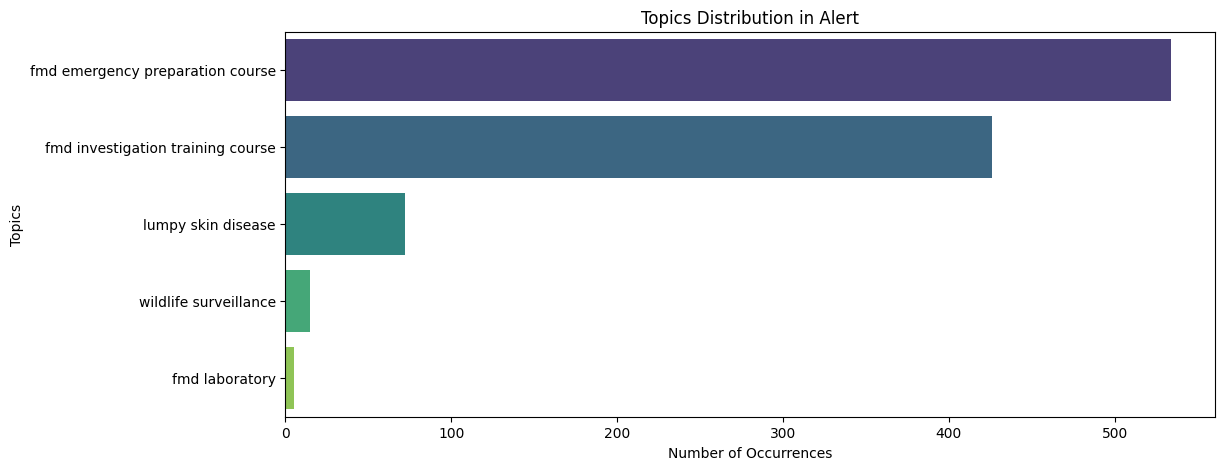

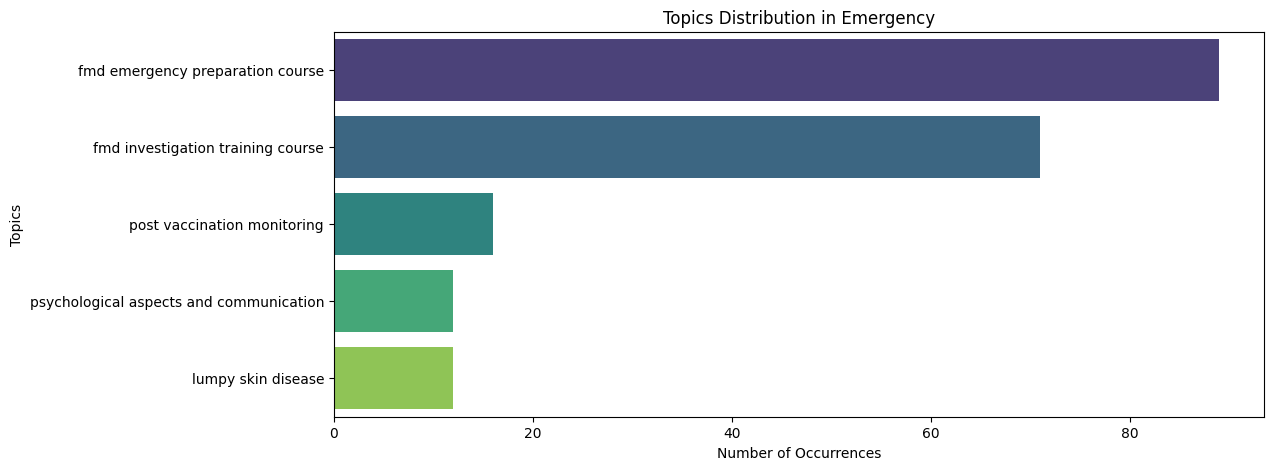

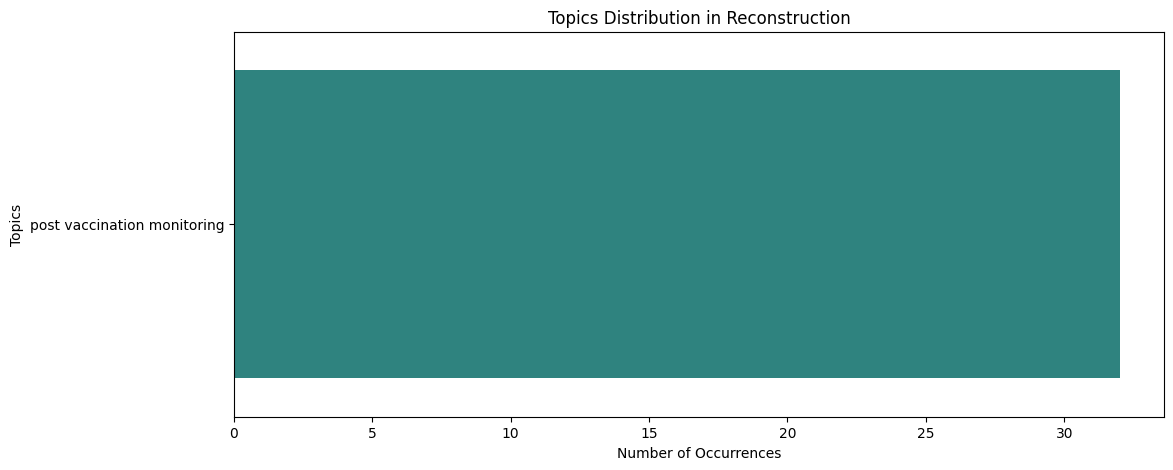

In [48]:
# main categories list
main_categories = new_brick_map['Main Category'].unique()

# bar chart
for category in main_categories:
    # Filter for the current main category
    category_df = new_brick_map[new_brick_map['Main Category'] == category]
    
    # Count the occurrences of each topic
    topic_counts = category_df['Topics'].explode().value_counts()
    
    # Plot the bar chart
    plt.figure(figsize=(12, 5))
    sns.barplot(x=topic_counts.values, y=topic_counts.index, palette="viridis", hue=topic_counts.index, dodge=False, legend=False)
    plt.title(f'Topics Distribution in {category}')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Topics')
    plt.show()

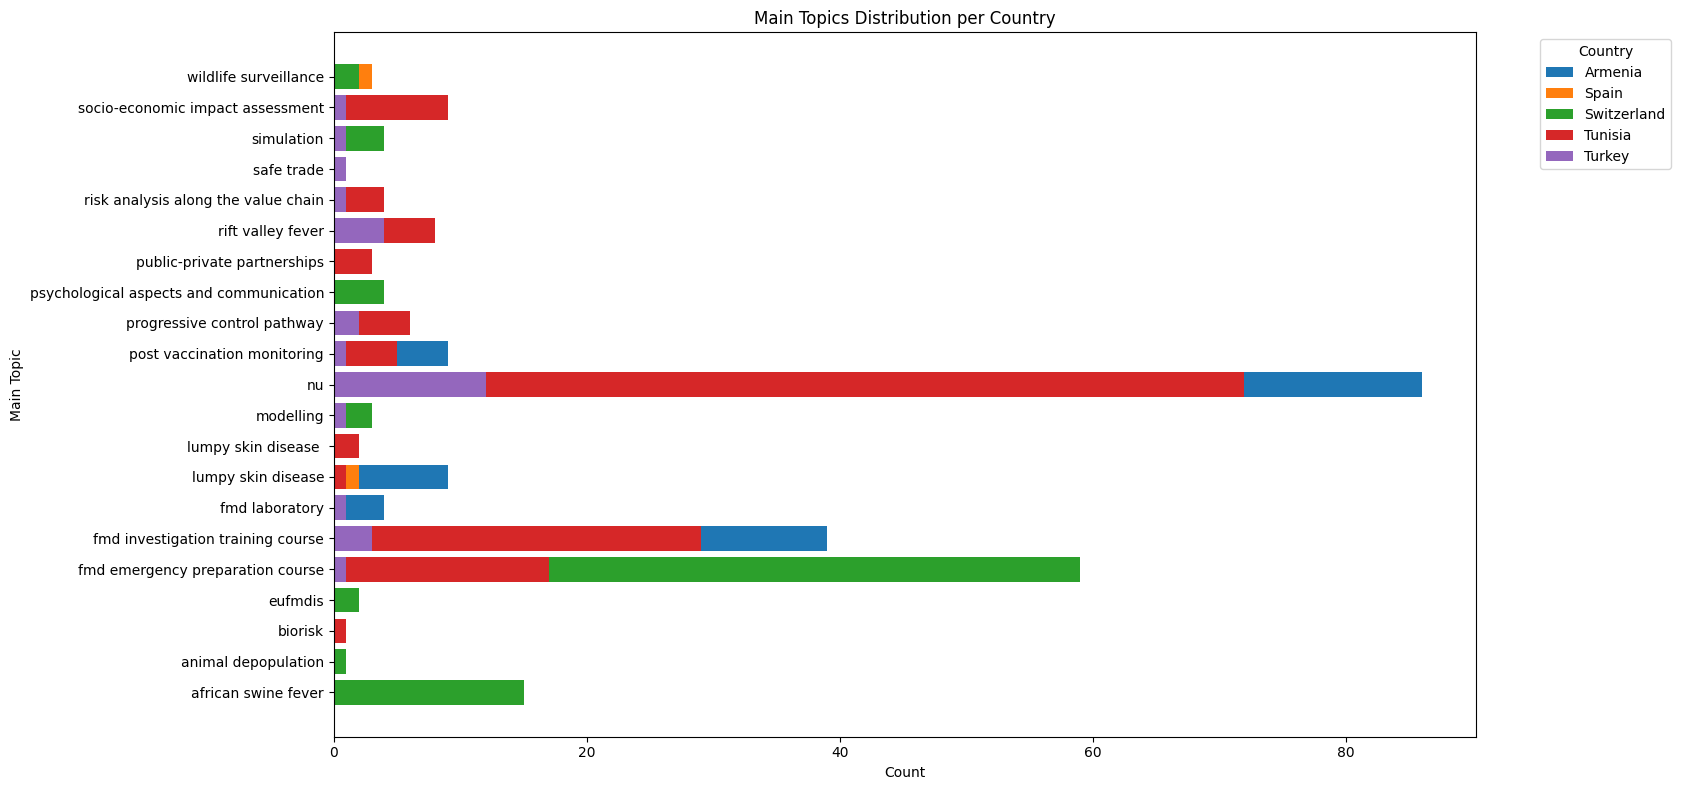

In [49]:
# Group by 'country' and aggregate 'Main topic' count
country_topic_counts = merge_master_enrolments_bricks.groupby('country')['main_topic'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(17, 8))  

# Iterate over each country and plot its main topics count horizontally
for i, country in enumerate(country_topic_counts.index):
    topics_count = country_topic_counts.loc[country]
    plt.barh(topics_count.index, topics_count.values, label=country)

plt.xlabel('Count')
plt.ylabel('Main Topic')
plt.title('Main Topics Distribution per Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [50]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Armenia'].groupby('main_topic').size().sort_values(ascending=False)

main_topic
nu                                     86
fmd investigation training course      39
lumpy skin disease                      9
post vaccination monitoring             9
fmd emergency preparation course        8
socio-economic impact assessment        6
fmd laboratory                          4
progressive control pathway             3
risk analysis along the value chain     3
public-private partnerships             2
lumpy skin disease                      1
safe trade                              1
dtype: int64

In [51]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Armenia'].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', axis=1).sum().sort_values(ascending=False)

Foundation: Contingency planning                             65.0
Alert: Personal biosecurity                                  60.0
Alert: Awareness                                             56.0
Foundation: Surveillance                                     56.0
Alert: Farm biosecurity                                      56.0
Alert: Sampling                                              56.0
Alert: Epidemiological Investigation                         56.0
Alert: Clinical Examination                                  56.0
Emergency: Restricted zones                                  56.0
Foundation: Laboratories                                     12.0
Reconstruction: Recovery of disease status                    9.0
Reconstruction: Vaccination exit strategy                     9.0
Emergency: Vaccination                                        9.0
Emergency: National emergency anagement                       0.0
Emergency: Movement control                                   0.0
Emergency:

In [52]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Turkey'].groupby('main_topic').size().sort_values(ascending=False)

main_topic
nu                                     12
rift valley fever                       4
fmd investigation training course       3
progressive control pathway             2
fmd emergency preparation course        1
fmd laboratory                          1
modelling                               1
post vaccination monitoring             1
risk analysis along the value chain     1
safe trade                              1
simulation                              1
socio-economic impact assessment        1
dtype: int64

In [53]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Turkey'].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', axis=1).sum().sort_values(ascending=False)

Alert: Personal biosecurity                                  5.0
Foundation: Contingency planning                             5.0
Alert: Awareness                                             4.0
Foundation: Surveillance                                     4.0
Alert: Farm biosecurity                                      4.0
Alert: Sampling                                              4.0
Alert: Epidemiological Investigation                         4.0
Alert: Clinical Examination                                  4.0
Emergency: Restricted zones                                  4.0
Foundation: Laboratories                                     2.0
Reconstruction: Recovery of disease status                   1.0
Reconstruction: Vaccination exit strategy                    1.0
Emergency: Vaccination                                       1.0
Emergency: National emergency anagement                      0.0
Emergency: Movement control                                  0.0
Emergency: Coordination a

In [54]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Spain'].groupby('main_topic').size().sort_values(ascending=False)

main_topic
nu                                  11
fmd emergency preparation course     4
simulation                           3
wildlife surveillance                3
lumpy skin disease                   2
modelling                            2
african swine fever                  1
animal depopulation                  1
eufmdis                              1
post vaccination monitoring          1
dtype: int64

In [55]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Spain'].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', axis=1).sum().sort_values(ascending=False)

Foundation: Surveillance                                     9.0
Alert: Personal biosecurity                                  9.0
Alert: Farm biosecurity                                      9.0
Alert: Sampling                                              9.0
Foundation: Contingency planning                             7.0
Alert: Awareness                                             6.0
Alert: Epidemiological Investigation                         6.0
Alert: Clinical Examination                                  6.0
Emergency: Restricted zones                                  6.0
Foundation: Laboratories                                     4.0
Reconstruction: Recovery of disease status                   1.0
Reconstruction: Vaccination exit strategy                    1.0
Emergency: Vaccination                                       1.0
Emergency: National emergency anagement                      0.0
Emergency: Movement control                                  0.0
Emergency: Coordination a

In [56]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Switzerland'].groupby('main_topic').size().sort_values(ascending=False)

main_topic
nu                                         60
fmd emergency preparation course           59
african swine fever                        15
progressive control pathway                 4
psychological aspects and communication     4
simulation                                  4
modelling                                   3
eufmdis                                     2
lumpy skin disease                          2
wildlife surveillance                       2
animal depopulation                         1
dtype: int64

In [57]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Switzerland'].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', axis=1).sum().sort_values(ascending=False)

Foundation: Contingency planning                             63.0
Foundation: Surveillance                                     61.0
Alert: Personal biosecurity                                  61.0
Alert: Farm biosecurity                                      61.0
Alert: Sampling                                              61.0
Alert: Awareness                                             59.0
Alert: Epidemiological Investigation                         59.0
Alert: Clinical Examination                                  59.0
Emergency: Restricted zones                                  59.0
Foundation: Laboratories                                     59.0
Emergency: Humane killing of animals                          4.0
Emergency: Psychological support                              4.0
Emergency: Communication                                      4.0
Emergency: National emergency anagement                       0.0
Emergency: Movement control                                   0.0
Emergency:

In [58]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Tunisia'].groupby('main_topic').size().sort_values(ascending=False)

main_topic
nu                                     72
fmd investigation training course      29
fmd emergency preparation course       17
socio-economic impact assessment        9
rift valley fever                       8
progressive control pathway             6
post vaccination monitoring             5
risk analysis along the value chain     4
public-private partnerships             3
lumpy skin disease                      2
biorisk                                 1
lumpy skin disease                      1
simulation                              1
dtype: int64

In [59]:
merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == 'Tunisia'].filter(regex=r'^(Foundation:|Alert:|Emergency:|Reconstruction:)', axis=1).sum().sort_values(ascending=False)

Foundation: Contingency planning                             52.0
Alert: Awareness                                             47.0
Foundation: Surveillance                                     47.0
Alert: Personal biosecurity                                  47.0
Alert: Farm biosecurity                                      47.0
Alert: Sampling                                              47.0
Alert: Epidemiological Investigation                         47.0
Alert: Clinical Examination                                  47.0
Emergency: Restricted zones                                  47.0
Foundation: Laboratories                                     17.0
Reconstruction: Recovery of disease status                    5.0
Reconstruction: Vaccination exit strategy                     5.0
Emergency: Vaccination                                        5.0
Foundation: Simulation exercises                              1.0
Emergency: National emergency anagement                       0.0
Emergency:

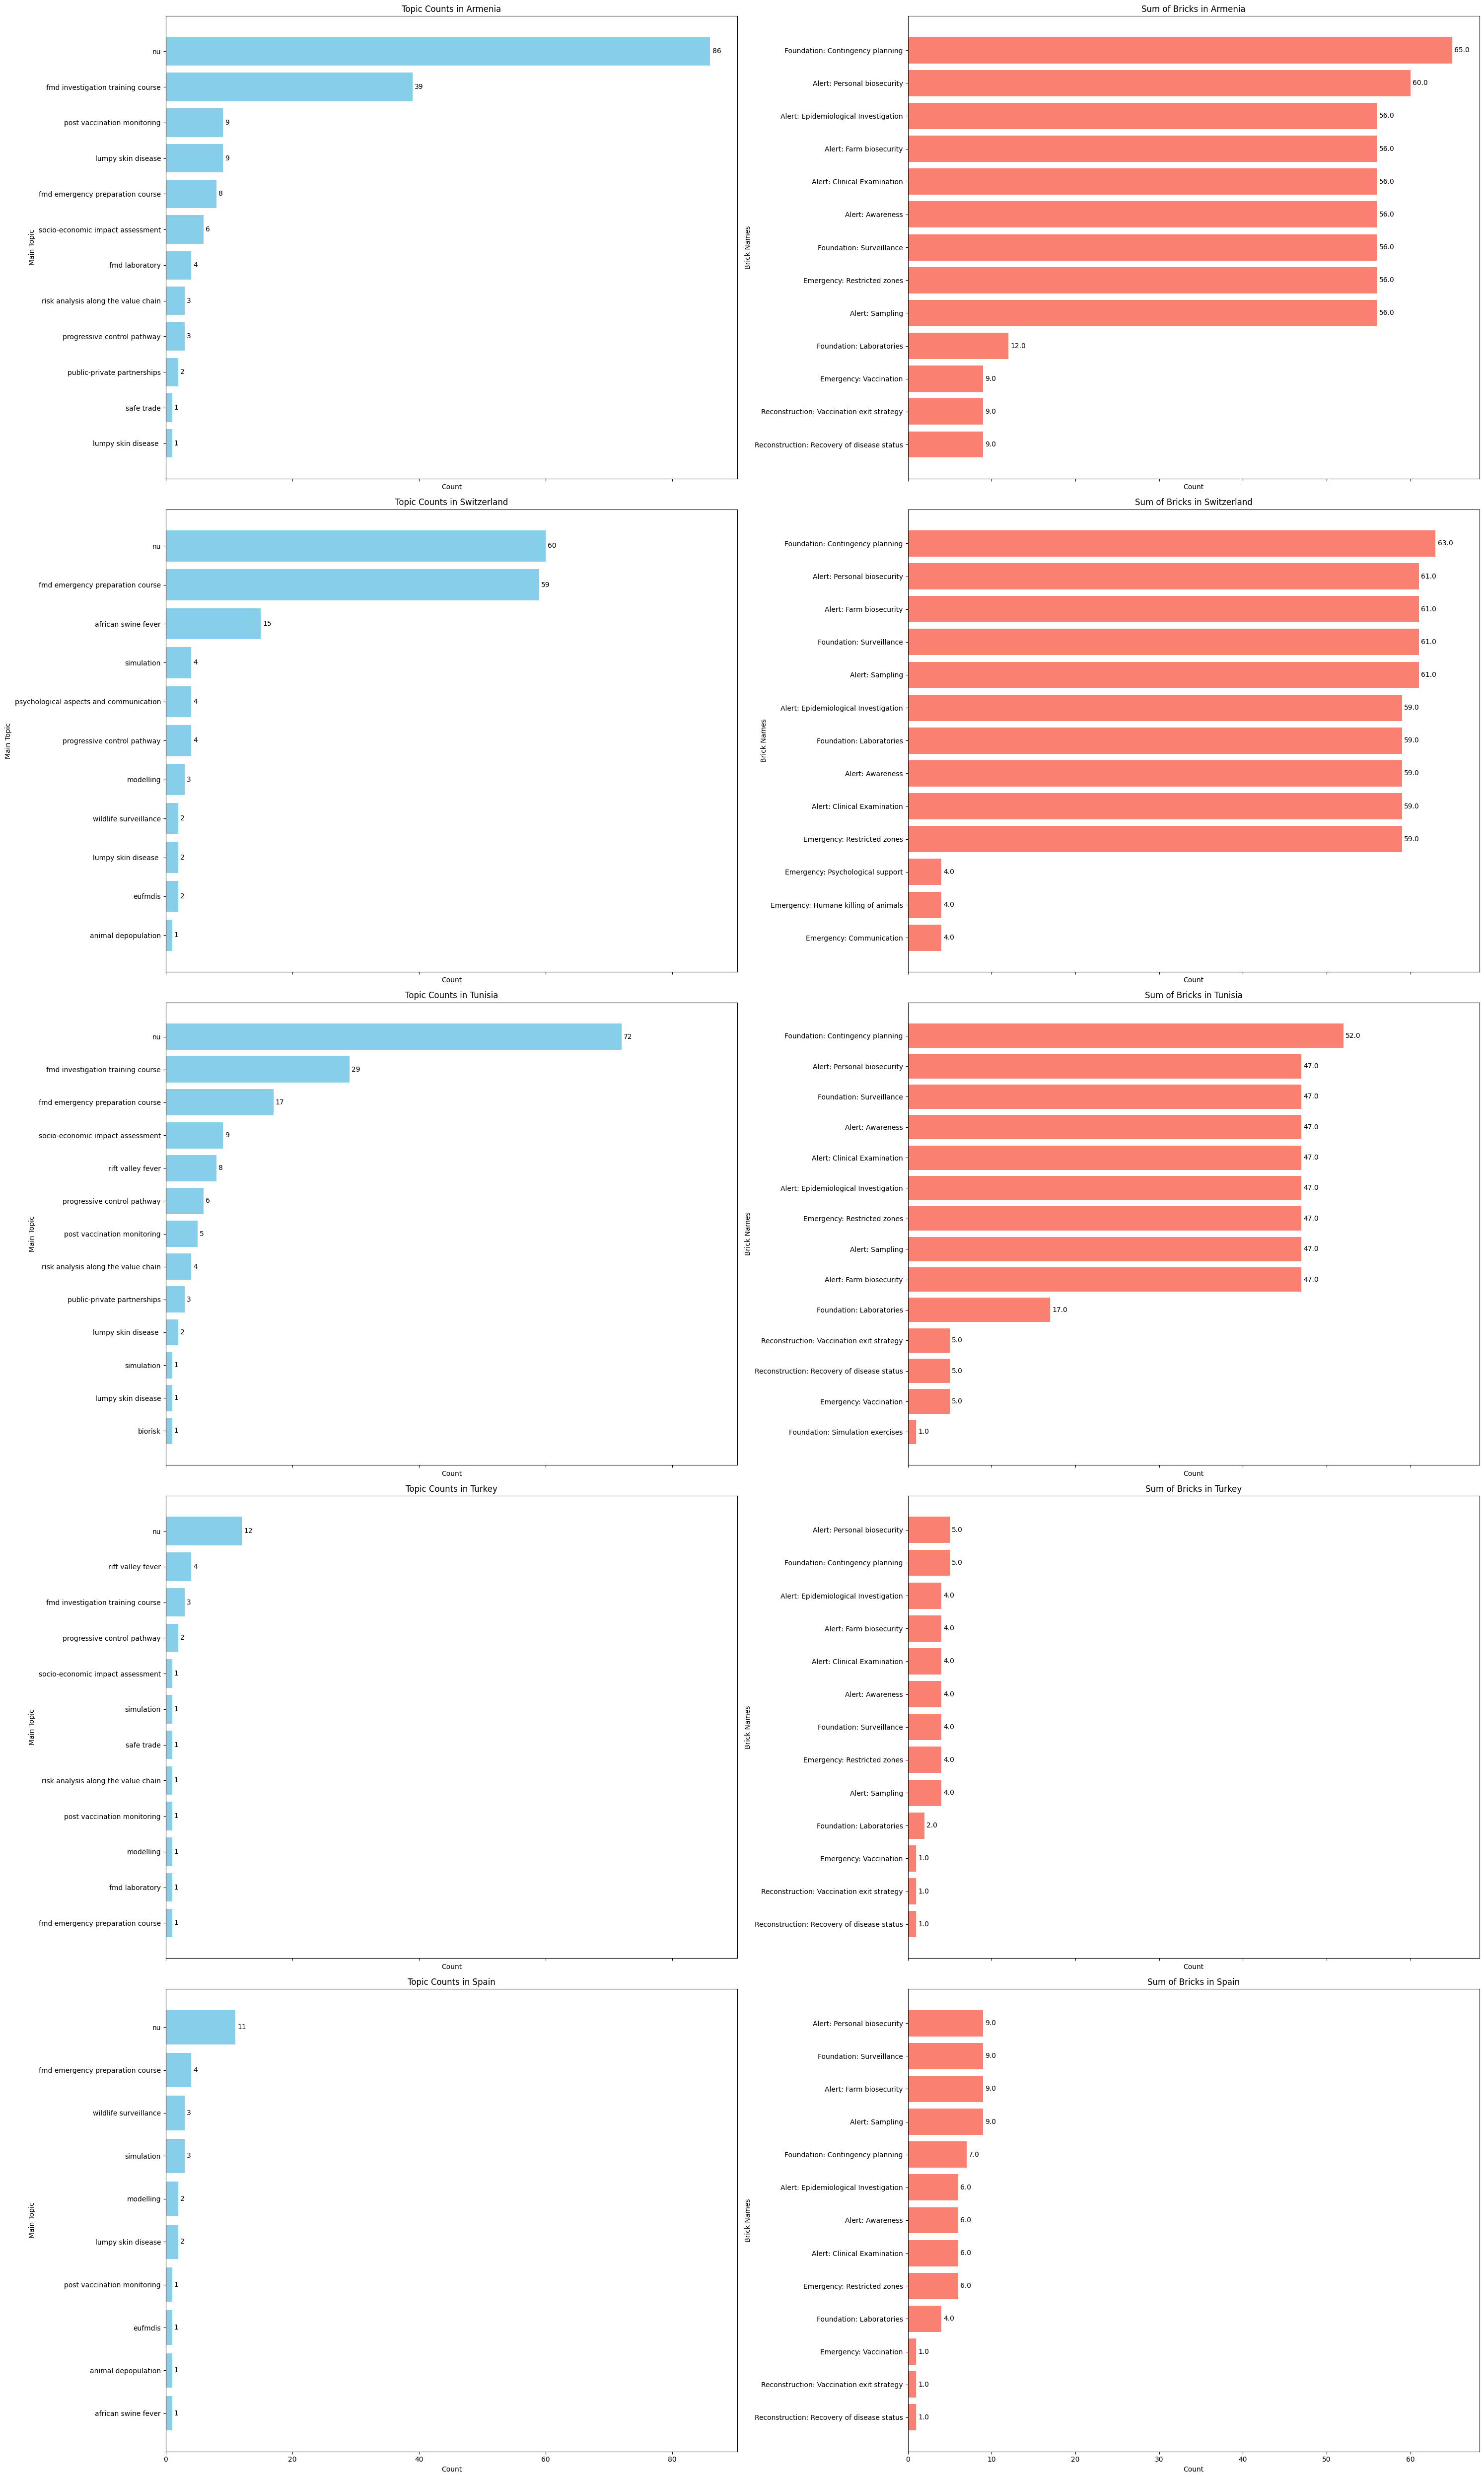

In [60]:
# Define countries in your dataset
countries = merge_master_enrolments_bricks['country'].unique()

# Filter columns with startswith
prefixes = ['Foundation:', 'Alert:', 'Emergency:', 'Reconstruction:']

# Create subplots
num_countries = len(countries)
fig, axs = plt.subplots(num_countries, 2, figsize=(30, 10 * num_countries), sharex='col')

# Iterate over each country
for i, country in enumerate(countries):
    # Filter data for the current country
    country_data = merge_master_enrolments_bricks[merge_master_enrolments_bricks['country'] == country]
    
    # Compute topic counts
    topic_counts = country_data['main_topic'].value_counts().sort_index().sort_values(ascending=True)
    
    # Compute summed binary values for the current country
    binary_sums = country_data.filter(regex='^' + '|'.join(prefixes), axis=1).sum().sort_values(ascending=True)

    # Filter out bars with 0 values
    binary_sums = binary_sums[binary_sums != 0]
    
    # Plot topic counts
    bars1 = axs[i, 0].barh(topic_counts.index, topic_counts.values, color='skyblue')
    axs[i, 0].set_xlabel('Count')
    axs[i, 0].set_ylabel('Main Topic')
    axs[i, 0].set_title(f'Topic Counts in {country}')
    
    # Add count labels on top of bars
    for bar in bars1:
        width = bar.get_width()
        axs[i, 0].annotate(f'{width}',
                           xy=(width, bar.get_y() + bar.get_height() / 2),
                           xytext=(3, 0),  # 3 points horizontal offset
                           textcoords='offset points',
                           ha='left', va='center')
    
    # Plot summed binary values
    bars2 = axs[i, 1].barh(binary_sums.index, binary_sums.values, color='salmon')
    axs[i, 1].set_xlabel('Count')
    axs[i, 1].set_ylabel('Brick Names')
    axs[i, 1].set_title(f'Sum of Bricks in {country}')
    
    # Add count labels on top of bars
    for bar in bars2:
        width = bar.get_width()
        axs[i, 1].annotate(f'{width}',
                           xy=(width, bar.get_y() + bar.get_height() / 2),
                           xytext=(3, 0),  # 3 points horizontal offset
                           textcoords='offset points',
                           ha='left', va='center')
    
    # Adjust layout
    plt.tight_layout()

plt.show()

# Explore db_training database to gather more countries

In [61]:
enrols_data = "SELECT * FROM db_training.moodle_enrols"

moodle_enrols = create_df_pymysql(connection_details, enrols_data)

/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_97594/1828803800.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [62]:
users_data = "SELECT * FROM db_training.moodle_users"

moodle_users = create_df_pymysql(connection_details, users_data)

/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_97594/1828803800.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [63]:
courses_data = "SELECT * FROM db_training.moodle_courses"

moodle_courses = create_df_pymysql(connection_details, courses_data)

/var/folders/t3/j6bxkcns4fg5jmpk0m7bc3580000gn/T/ipykernel_97594/1828803800.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [64]:
moodle_enrols.head()

,id,user_id,course_id,progress,status,enrol_date,completion_date
0,0,6,2,50,Open,2013-05-17,None
1,1,6,3,50,Open,2013-05-17,None
2,2,6,4,50,Open,2013-05-18,None
3,3,2,4,50,Open,2013-05-18,None
4,4,10,2,50,Open,2013-05-20,None


In [65]:
moodle_users.head()

,id,username,fullname,email,firstaccess,lastaccess,city,country,description,interests,gender,education,institution,job,role,native_language,second_language
0,1,guest,Guest user,root@localhost,1970-01-01,1970-01-01,,,This user is a special user that allows read-o...,,,,,,,,
1,2,eufmdadmin,EU FMD Admin User,siward@rvc.ac.uk,2013-05-07,2018-12-13,London,GB,,,,,,,,,
2,6,jennymaud,Jenny Maud,jenny.maud@fao.org,2013-05-10,2024-01-09,Rome,IT,"I am a veterinarian originally from the UK, w...",,,Masters degree,FAO,Veterinary Education Specialist,,English,English
3,7,baudsley,Ben Audsley,baudsley@rvc.ac.uk,2013-05-13,2016-01-18,London,GB,,,,,,,,,
4,8,gregoriotorres,Gregorio Torres,gtorresvet@hotmail.com,2013-05-22,2021-07-06,Madrid,ES,,,,,,,,,


In [66]:
moodle_courses.head()

,id,shortname,fullname,summary,creation_date,language,category_id,duration,format,main_topic,edition
0,1,EuFMD vLearning,EuFMD Virtual Learning,EuFMD Virtual Learning is the training website...,2013-05-07,English,0,12,vlearning,,1
1,2,KTC 6 Induction Course,KTC 6 Induction Course,An introductory course taken by trainees prior...,2013-05-17,English,13,12,vlearning,,6
2,3,Knowledge Bank,Knowledge Bank,,2013-05-17,English,1,12,vlearning,,1
3,4,Playpen,Playpen,This course is for experimenting with!,2013-05-18,English,3,12,vlearning,,1
4,7,KTC 7 Induction Course,KTC 7 Induction Course,An introductory course taken by trainees prior...,2013-05-27,English,13,12,vlearning,,7


In [67]:
moodle_courses["shortname"] = moodle_courses["shortname"].str.lower()
moodle_courses["main_topic"] = moodle_courses["main_topic"].str.lower()

In [68]:
# Find the common ground (intersection) between the two datasets
common_courses = set(master_courses["shortname"]) & set(moodle_courses["shortname"])

# Print the common courses
print("Common Courses:")
for course in common_courses:
    print(course)

Common Courses:
fitc_saarc
ntc 15 induction course
flitc3
focusgroup
ctc_1
ktc 32
fmd emergency preparation course linktads
fitc_ncw_africa
r-fetpv first module
fmd modeling sk
workshop portugal october 2016
isavetfir
fitc_al
managing a crisis
refresher training example
fepc_es5
rpl_edm_3
resources archive
fepc_en_3
introduction to biostatistics
fitc_tr2
fepc_en10
socio-economic
rpl_tad3
modelling network
fepc_en_6
rp
knowledge bank
nord-baltic_simex
simulation exercise workshop: february 2017
ppr
ktc 34
ntc 20 real time training
ad_fast_doi
ntc 29 real time training
asf_europe
amr_ffs
isavet epi surv
ex_fitc_teaser1
fepc_fr23
frontline
ntc 24 real time training
simex_workshop2
playpen
rpl_aw_1
fepc_de_1
intro_ocp1
fitc_wc_africa_fr1
emergency preparedness network
fepc_canada
rtt_reunion_europe
onboarding_page1
asf_ca_enfr_1_21
open session online 2014
rpl_edm_4
rpl_bios_4
ktc 24 real time training
ntc 14 induction course
erzurum real time training
btsf
fepc_calgary2
ntc 16 induction c

In [69]:
common_courses

{' introduction to the progressive control pathway arabic',
 'aat',
 'about',
 'ad_fast_doi',
 'afrique du nord',
 'amr',
 'amr_ffs',
 'amr_ffs_copy',
 'appp-fast',
 'asf_asiapac',
 'asf_balkanregion',
 'asf_ca_enfr_1_21',
 'asf_europe',
 'asf_lac',
 'asf_pilot',
 'atelier mali',
 'biorisk',
 'biorisk_management_network',
 'btsf',
 'cascade training',
 'cdev',
 'contingency planning knowledge bank',
 'contingency planning network',
 'contingency planning self-assessment tool',
 'course reports',
 'ctc_1',
 'ddcd',
 'ddcd_2',
 'earln',
 'emergency preparedness network',
 'emergency vaccination 2019',
 'erzurum real time training',
 'eufmd vlearning',
 'eufmd_see',
 'eufmdis',
 'ex_fitc_teaser1',
 'ex_ravc_teaser1',
 'fast_dwsc',
 'fast_dwsc_2',
 'fdcm',
 'fepc_algerie',
 'fepc_au1',
 'fepc_au2',
 'fepc_au3',
 'fepc_au4',
 'fepc_belgium_frnl_1_2021',
 'fepc_bh_1',
 'fepc_calgary',
 'fepc_calgary2',
 'fepc_calgary3',
 'fepc_canada',
 'fepc_canada2',
 'fepc_canada3',
 'fepc_caribbean',
 'f

In [70]:
# Convert course categories to sets for efficient membership checks
moodle_categories = set(moodle_courses["shortname"])
master_topics = set(master_courses["shortname"])

# Find courses in Tom's enrolments but not in brick_mapping (difference)
moodle_only_courses = moodle_categories.difference(master_topics)

# Find courses in brick_mapping but not in Tom's enrolments (difference)
master_only_courses = master_topics.difference(moodle_categories)

# Print courses only in Tom's enrolments
print("Courses only in Moodle's courses:")
for course in moodle_only_courses:
    print(course)

Courses only in Moodle's courses:
fepc_calgary4
rtc 4
fast_dccm_dpapp 2
pvp_3_23
fepc_canada4
riskmapping_me
intro_rap_fr
ntc_35
fast_pmsr
intro_fmd_2_1
introrvf fr
fepc_fra4
sctom
cascading_hub
riskmapping_na
riskmapping_seen
fast_dwsc_3
ntc_33
vrtt_fast_au_2
pcp-fmd-2_2024
intro_sppgtp
fastdd
lsd_es
fepc_en14
ntc_34
rtc2
rtc 3
fitc_tr_7
spgppc
intro_se_openaccess


In [71]:
# Print courses only in brick_mapping
print("Courses only in master_courses:")
for course in master_only_courses:
    print(course)

Courses only in master_courses:
fmd_pms1
introrift valley fever fr


In [72]:
# Merge the DataFrames based on the new mapping
merge_master_moodlecourses = pd.merge(moodle_courses, master_courses, left_on="shortname", right_on="shortname", how="left")

In [73]:
merge_master_moodlecourses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               397 non-null    int64  
 1   shortname        397 non-null    object 
 2   fullname_x       397 non-null    object 
 3   summary          397 non-null    object 
 4   creation_date    397 non-null    object 
 5   language_x       397 non-null    object 
 6   category_id      397 non-null    int64  
 7   duration_x       397 non-null    int64  
 8   format_x         397 non-null    object 
 9   main_topic_x     397 non-null    object 
 10  edition_x        397 non-null    int64  
 11  moodle_id        367 non-null    float64
 12  fullname_y       367 non-null    object 
 13  language_y       366 non-null    object 
 14  format_y         367 non-null    object 
 15  moodle_category  366 non-null    object 
 16  main_topic_y     367 non-null    object 
 17  level           

In [74]:
merge_master_moodlecourses.isna().sum()

id                   0
shortname            0
fullname_x           0
summary              0
creation_date        0
language_x           0
category_id          0
duration_x           0
format_x             0
main_topic_x         0
edition_x            0
moodle_id           30
fullname_y          30
language_y          31
format_y            30
moodle_category     31
main_topic_y        30
level              129
edition_y           30
pillar             228
duration_y          30
dtype: int64

In [75]:
merge_master_moodlecourses[merge_master_moodlecourses["main_topic_y"].isna()]

,id,shortname,fullname_x,summary,creation_date,language_x,category_id,duration_x,format_x,main_topic_x,...,moodle_id,fullname_y,language_y,format_y,moodle_category,main_topic_y,level,edition_y,pillar,duration_y
193,421,ntc_33,NTC 33 Real Time Training,,2019-12-31,English,12,32,vlearning,real time training,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,423,rtc2,RTC2 - Kenya Real Time Training,,2019-12-31,English,12,28,vlearning,real time training,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,430,vrtt_fast_au_2,Virtual Real-time training for FMD and Similar...,,2019-12-31,English,2,12,vlearning,public-private partnerships,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,435,ntc_34,NTC 34 Real Time Training,,2019-12-31,English,12,12,vlearning,real time training,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,440,cascading_hub,Cascading hub,,2019-12-31,English,61,12,vlearning,public-private partnerships,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,441,rtc 3,RTC3 - Kenya Real Time Training,,2019-12-31,English,12,12,vlearning,real time training,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,443,rtc 4,RTC4 - Kenya Real Time Training,,2019-12-31,English,12,10,vlearning,real time training,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,445,pcp-fmd-2_2024,Progressive Control Pathway for Foot-and-Mout...,,2019-12-31,English,23,12,vlearning,progressive control pathway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,446,ntc_35,NTC35 Real-time training,,2019-12-31,English,12,12,vlearning,public-private partnerships,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,439,fast_dwsc_3,FAST Diseases Wildlife Surveillance course 3,,2020-02-28,English,44,12,workshop,wildlife surveillance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Merge the DataFrames
merge_users_enrols = pd.merge(moodle_users, moodle_enrols, left_on="id", right_on="user_id", how="left")

In [77]:
merge_users_enrols.columns.unique()

Index(['id_x', 'username', 'fullname', 'email', 'firstaccess', 'lastaccess',
       'city', 'country', 'description', 'interests', 'gender', 'education',
       'institution', 'job', 'role', 'native_language', 'second_language',
       'id_y', 'user_id', 'course_id', 'progress', 'status', 'enrol_date',
       'completion_date'],
      dtype='object')

In [78]:
merge_enrols_users = pd.merge(moodle_enrols, moodle_users, left_on="user_id", right_on="id", how="left")

In [79]:
merge_enrols_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111960 entries, 0 to 111959
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_x             111960 non-null  int64  
 1   user_id          111960 non-null  int64  
 2   course_id        111960 non-null  int64  
 3   progress         111960 non-null  int64  
 4   status           111960 non-null  object 
 5   enrol_date       111960 non-null  object 
 6   completion_date  17680 non-null   object 
 7   id_y             111956 non-null  float64
 8   username         111956 non-null  object 
 9   fullname         111956 non-null  object 
 10  email            111956 non-null  object 
 11  firstaccess      111956 non-null  object 
 12  lastaccess       111956 non-null  object 
 13  city             111956 non-null  object 
 14  country          111956 non-null  object 
 15  description      111956 non-null  object 
 16  interests        111956 non-null  obje

In [80]:
merge_enrols_users.isna().sum()

id_x                   0
user_id                0
course_id              0
progress               0
status                 0
enrol_date             0
completion_date    94280
id_y                   4
username               4
fullname               4
email                  4
firstaccess            4
lastaccess             4
city                   4
country                4
description            4
interests              4
gender                 4
education              4
institution            4
job                    4
role                   4
native_language        4
second_language        4
dtype: int64

In [81]:
merge_users_enrols.isna().sum()

id_x                   0
username               0
fullname               0
email                  0
firstaccess            0
lastaccess             0
city                   0
country                0
description            0
interests              0
gender                 0
education              0
institution            0
job                    0
role                   0
native_language        0
second_language        0
id_y                2378
user_id             2378
course_id           2378
progress            2378
status              2378
enrol_date          2378
completion_date    96654
dtype: int64

In [82]:
merge_master_moodlecourses.columns.unique()

Index(['id', 'shortname', 'fullname_x', 'summary', 'creation_date',
       'language_x', 'category_id', 'duration_x', 'format_x', 'main_topic_x',
       'edition_x', 'moodle_id', 'fullname_y', 'language_y', 'format_y',
       'moodle_category', 'main_topic_y', 'level', 'edition_y', 'pillar',
       'duration_y'],
      dtype='object')